In [151]:
# imports and file loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
#from sklearn.cluster import AffinityPropagation
#from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import LocallyLinearEmbedding
from yellowbrick.cluster import KElbowVisualizer

df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


# Task 2

In [152]:
# rescale the data

min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [153]:
# scatterpoint function

colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [154]:
# k-means clustering

k = 6  # verified in Task 2

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [155]:
# append cluster centers to the data

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [156]:
# apply mds to transform the data to 2d

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


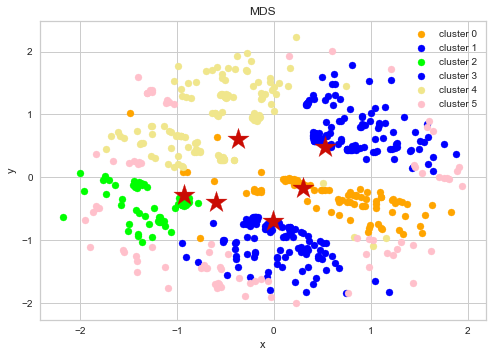

In [157]:
# plot

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [158]:
# apply t-sne to transform data to 2d

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


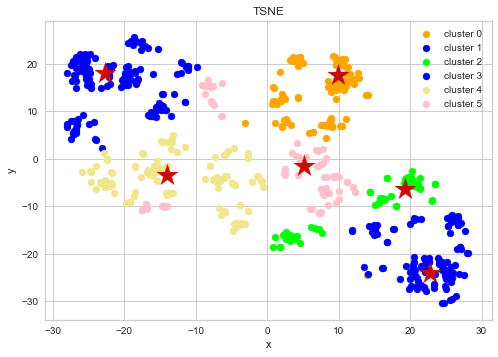

In [159]:
# plot

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [160]:
# analysis 

df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,349.103093,0.323024,0.936190,1.140688,0.704639,0.989691,0.927835,0.030928,1.000000,0.000000,0.164948,0.061856,0.247423,0.000000,0.000000,0.742268,0.926375
1,297.266667,0.308642,0.922554,1.119394,0.720741,0.985185,0.844444,0.014815,1.000000,0.000000,0.133333,0.029630,0.177778,1.000000,0.000000,0.896296,0.899543
2,271.627119,0.062147,0.843992,0.929833,0.716102,1.000000,0.627119,0.016949,0.000000,0.016949,0.118644,0.084746,0.101695,0.000000,1.000000,0.694915,0.754854
3,270.796460,0.356932,0.942410,1.103792,0.679867,0.991150,0.946903,0.017699,1.000000,0.000000,0.106195,0.061947,0.194690,0.000000,1.000000,0.814159,0.906050
4,321.648438,0.104167,0.927197,1.030551,0.735547,0.976562,0.609375,0.015625,0.000000,0.015625,0.132812,0.070312,0.257812,0.562500,0.000000,0.750000,0.814118
5,321.951220,0.268293,0.883670,1.067517,0.721037,0.000000,0.768293,0.036585,0.646341,0.000000,0.146341,0.012195,0.304878,0.317073,0.365854,0.000000,0.820308


From the above data several conculsions can be made:

* todo

# Task 3

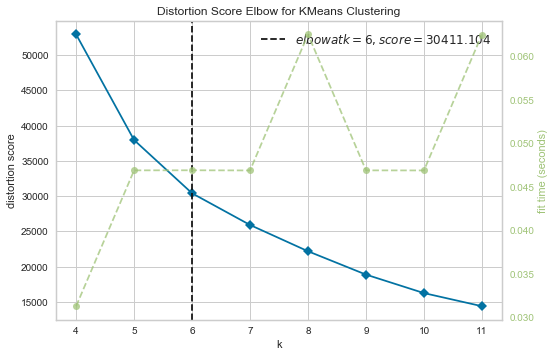

In [161]:
# elbow method for k value selection

# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(XYcoordinates)        # Fit the data to the visualizer
visualizer.show()                    # Finalize and render the figure

# Task 4

In [162]:
# mean shift clustering
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
#af = AffinityPropagation(max_iter=10000).fit(data)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)

#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms.fit(data)
#labels = ms.labels_
#cluster_centers = ms.cluster_centers_

#labels_unique = np.unique(labels)
#n_clusters_ = len(labels_unique)

# append cluster centers to the data

#data_complete = np.r_[data,cluster_centers]

ms = cluster.MeanShift(bandwidth).fit(data)

#print("number of estimated clusters : %d" % n_clusters_)

In [163]:
# append cluster centers to the data

data_complete = np.r_[data,ms.cluster_centers_]

In [164]:
# apply local linear embedding to transform data to 2d

XYcoordinates = manifold.LocallyLinearEmbedding(n_components=2).fit_transform(data_complete)

In [165]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=ms.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='MeanShift')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 610 but corresponding boolean dimension is 614